In [ ]:
import numpy as np

In [ ]:
def Dijkstra(N, S, matrix):
	valid = [True]*N        
	weight = [100000]*N
	weight[S] = 0
	i=0
	p=N
	while(i<p):
		min_weight = 100001
		ID_min_weight = -1
		for j in range(N):
			if valid[j] and weight[j] < min_weight:
				min_weight = weight[j]
				ID_min_weight = j
		for z in range(N):
			old_weight = weight[z]
			if matrix[ID_min_weight,z]!=100000 and weight[z]<100000:
				weight[z] = max(weight[ID_min_weight] + matrix[ID_min_weight,z], weight[z])
			elif matrix[ID_min_weight,z]!=100000 and weight[z]>=100000:
				weight[z] = weight[ID_min_weight] + matrix[ID_min_weight,z]
			if (not valid[z]) and old_weight != weight[z]:
				valid[z] = True
				p+=1
		i+=1

		valid[ID_min_weight] = False
	return weight

In [ ]:
def TransToGraphMatrix(rows ,cols , matrix):
  graphMatrix = np.matrix([[100000 for l in range(rows*cols)] for y in range(rows*cols)])
  for i in range(rows-1):
    for j in range(cols-1):
      graphMatrix[(i*cols)+j, (i*cols)+j+1] = matrix[i, j+1]
      graphMatrix[(i*cols)+j, (i*cols)+j+cols] = matrix[i+1, j]

  for i in range(1,rows):
    graphMatrix[i*cols-1, (i+1)*cols-1] = matrix[i, cols-1]
  for i in range(0,cols - 1):
    graphMatrix[(rows-1) * cols + i, (rows-1) * cols + i + 1] = matrix[rows-1, i+1]
  for i in range(0, cols*rows):
    graphMatrix[i,i] = 0
  return graphMatrix;
 


In [ ]:
def Normalize(rows, cols, subrows, subcols, matrix):
  newMat = [[0 for y in range(rows*cols)] for i in range(rows*subrows)]
  for i in range(rows):
    for j in range(cols):
      for x in range(subrows):
        for y in range(subcols):
          newMat[i*subrows+x][j * subcols + y] = matrix[i][j][x,y]
  return newMat


In [ ]:
p = 3
s = 4
n = 12
k = int(n/p)

T = [[1,4,3,1],
     [3,2,4,3],
     [1,2,4,2],
     [3,2,4,1],
     [3,1,2,3],
     [4,3,2,1],
     [4,2,4,2],
     [3,3,1,2],
     [2,1,4,3],
     [2,2,2,1],
     [3,4,2,1],
     [4,2,3,1]]

submatrices = [np.matrix([]) for y in range(k)]
for i in range(k):
  submatrices[i] = np.matrix(T[i*p:p*(i+1)])
print(submatrices)

[matrix([[1, 4, 3, 1],
        [3, 2, 4, 3],
        [1, 2, 4, 2]]), matrix([[3, 2, 4, 1],
        [3, 1, 2, 3],
        [4, 3, 2, 1]]), matrix([[4, 2, 4, 2],
        [3, 3, 1, 2],
        [2, 1, 4, 3]]), matrix([[2, 2, 2, 1],
        [3, 4, 2, 1],
        [4, 2, 3, 1]])]


In [ ]:
Tm = [[np.matrix([[0 for y in range(s)]for x in range(p)]) for j in range(k)] for i in range(k)]
for i in range(k):
  for j in range(k-i):
    Tm[j][i]=(submatrices[j+i])

print(np.matrix(Normalize(k,k,p,s,Tm)))
graphMatrix = TransToGraphMatrix(k*p, k*s, np.matrix(Normalize(k,k,p,s,Tm)))
print(Dijkstra(k*p*k*s, 0, graphMatrix)[k*p*k*s-1])

[[1 4 3 1 3 2 4 1 4 2 4 2 2 2 2 1]
 [3 2 4 3 3 1 2 3 3 3 1 2 3 4 2 1]
 [1 2 4 2 4 3 2 1 2 1 4 3 4 2 3 1]
 [3 2 4 1 4 2 4 2 2 2 2 1 0 0 0 0]
 [3 1 2 3 3 3 1 2 3 4 2 1 0 0 0 0]
 [4 3 2 1 2 1 4 3 4 2 3 1 0 0 0 0]
 [4 2 4 2 2 2 2 1 0 0 0 0 0 0 0 0]
 [3 3 1 2 3 4 2 1 0 0 0 0 0 0 0 0]
 [2 1 4 3 4 2 3 1 0 0 0 0 0 0 0 0]
 [2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 4 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 2 3 1 0 0 0 0 0 0 0 0 0 0 0 0]]
49


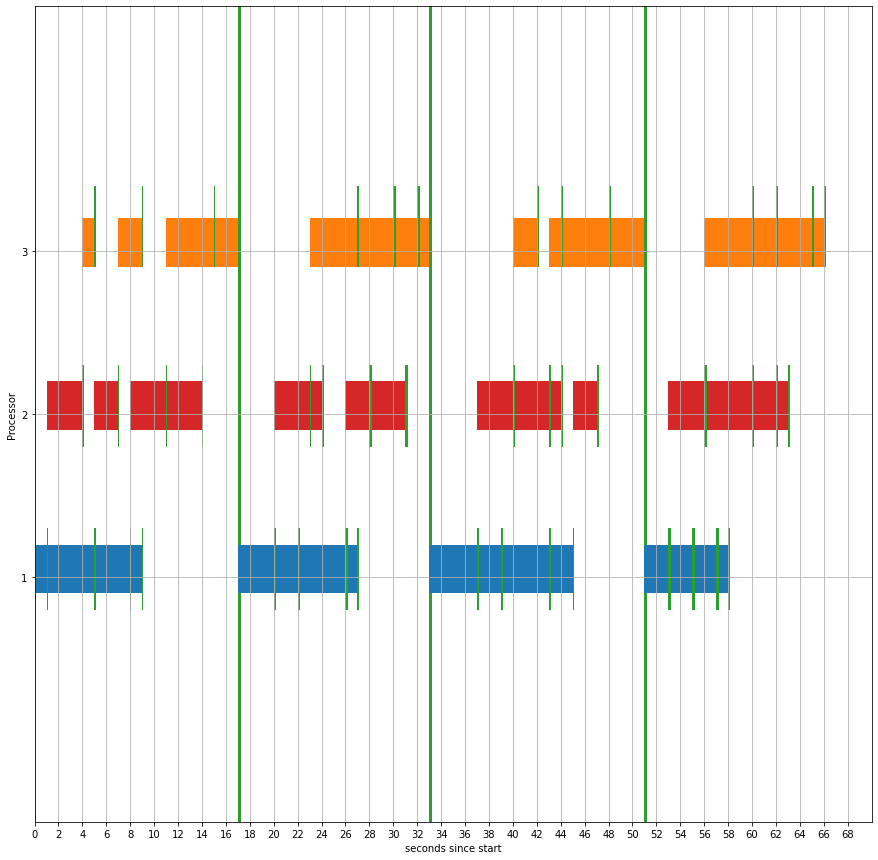

In [ ]:
import matplotlib.pyplot as plt 
  
fig, gnt = plt.subplots(1,1,figsize=(15,15))  
gnt.set_ylim(0, 50) 
  

gnt.set_xlim(0, 70) 
  
gnt.set_xlabel('seconds since start') 
gnt.set_ylabel('Processor') 
gnt.set_xticks([y for y in range(70)][::2]) 
gnt.set_yticks([15, 25, 35]) 

gnt.set_yticklabels(['1', '2', '3']) 
  
gnt.grid(True) 

gnt.broken_barh([(0, 1), (1, 4) ,(5, 3), (8,1)], (14, 3), 
                         facecolors ='tab:blue') 

gnt.broken_barh([(1, 0.1),(5, 0.1),(8, 0.1),(9, 0.1)], (13, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(1, 3), (5, 2), (8, 4), (11, 3)], (24, 3), 
                                  facecolors =('tab:red'))
gnt.broken_barh([(4, 0.1),(7, 0.1),(11, 0.1),(14, 0.1)], (23, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(4, 1),(7,2),(11,4),(15,2)], (34, 3), facecolors =('tab:orange')) 
gnt.broken_barh([(5, 0.1), (9,0.1),(15,0.1),(17,0.1)], (34, 5), 
                         facecolors ='tab:green') 
gnt.broken_barh([(17, 0.3)], (0, 60), 
                         facecolors ='tab:green') 
  
gnt.broken_barh([(17, 3), (20, 2) ,(22, 4), (26,1)], (14, 3), 
                         facecolors ='tab:blue') 
gnt.broken_barh([(20, 0.2),(22, 0.2),(26, 0.2),(27, 0.1)], (13, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(20, 3),(23,1),(26,2),(28,3)], (24, 3), 
                                  facecolors =('tab:red'))
gnt.broken_barh([(23, 0.1),(24,0.2),(28,0.2),(31,0.2)], (23, 5), 
                         facecolors ='tab:green') 
gnt.broken_barh([(23, 4),(27,3),(30,2),(32,1)], (34, 3), facecolors =('tab:orange')) 
gnt.broken_barh([(27, 0.1), (30,0.2),(32,0.2),(33,0.2)], (34, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(33, 0.2)], (0, 60), 
                         facecolors ='tab:green')


gnt.broken_barh([(33, 4), (37, 2) ,(39, 4), (43,2)], (14, 3), 
                         facecolors ='tab:blue') 
gnt.broken_barh([(37, 0.2),(39, 0.2),(43, 0.2),(45, 0.1)], (13, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(37, 3),(40,3),(43,1),(45,2)], (24, 3), 
                                  facecolors =('tab:red'))
gnt.broken_barh([(40, 0.2),(43,0.2),(44,0.2),(47,0.2)], (23, 5), 
                         facecolors ='tab:green') 
gnt.broken_barh([(40, 2),(43,1),(44,4),(48,3)], (34, 3), facecolors =('tab:orange')) 
gnt.broken_barh([(42, 0.2), (44,0.2),(48,0.2),(51,0.2)], (34, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(51, 0.2)], (0, 60), 
                         facecolors ='tab:green')


gnt.broken_barh([(51, 2), (53, 2) ,(55, 2), (57,1)], (14, 3), 
                         facecolors ='tab:blue') 
gnt.broken_barh([(53, 0.2),(55, 0.2),(57, 0.2),(58, 0.2)], (13, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(53, 3),(56,4),(60,2),(62,1)], (24, 3), 
                                  facecolors =('tab:red'))
gnt.broken_barh([(56, 0.2),(60,0.2),(62,0.2),(63,0.2)], (23, 5), 
                         facecolors ='tab:green') 
gnt.broken_barh([(56, 4),(60,2),(62,3),(65,1)], (34, 3), facecolors =('tab:orange')) 
gnt.broken_barh([(60, 0.2), (62,0.2),(65,0.2),(66,0.2)], (34, 5), 
                         facecolors ='tab:green') 

  


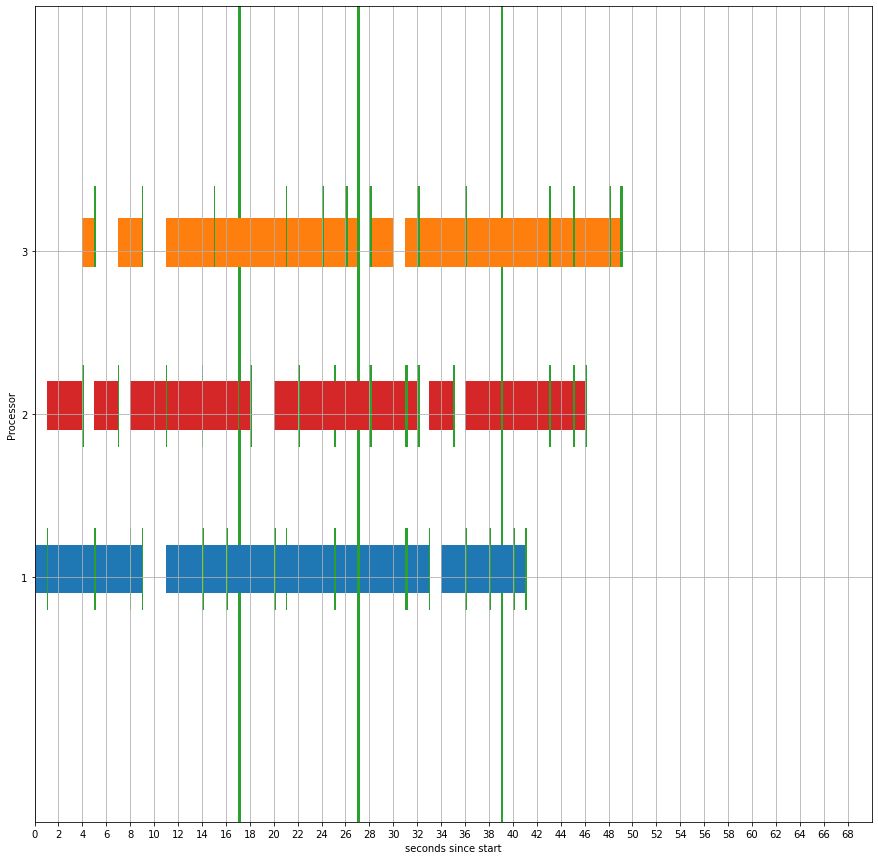

In [ ]:
fig, gnt = plt.subplots(1,1,figsize=(15,15))  
gnt.set_ylim(0, 50) 
  

gnt.set_xlim(0, 70) 
  
gnt.set_xlabel('seconds since start') 
gnt.set_ylabel('Processor') 
gnt.set_xticks([y for y in range(70)][::2]) 
gnt.set_yticks([15, 25, 35]) 

gnt.set_yticklabels(['1', '2', '3']) 
  
gnt.grid(True) 

gnt.broken_barh([(0, 1), (1, 4) ,(5, 3), (8,1)], (14, 3), 
                         facecolors ='tab:blue') 

gnt.broken_barh([(1, 0.1),(5, 0.1),(8, 0.1),(9, 0.1)], (13, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(1, 3), (5, 2), (8, 4), (11, 3)], (24, 3), 
                                  facecolors =('tab:red'))
gnt.broken_barh([(4, 0.1),(7, 0.1),(11, 0.1),(14, 0.1)], (23, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(4, 1),(7,2),(11,4),(15,2)], (34, 3), facecolors =('tab:orange')) 
gnt.broken_barh([(5, 0.1), (9,0.1),(15,0.1),(17,0.1)], (34, 5), 
                         facecolors ='tab:green') 
gnt.broken_barh([(17, 0.3)], (0, 60), 
                         facecolors ='tab:green') 
  



gnt.broken_barh([(11, 3), (14, 2) ,(16, 4), (20,1)], (14, 3), 
                         facecolors ='tab:blue') 
gnt.broken_barh([(14, 0.2),(16, 0.2),(20, 0.2),(21, 0.1)], (13, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(14, 3),(17,1),(20,2),(22,3)], (24, 3), 
                                  facecolors =('tab:red'))
gnt.broken_barh([(17, 0.1),(18,0.2),(22,0.2),(25,0.2)], (23, 5), 
                         facecolors ='tab:green') 
gnt.broken_barh([(17, 4),(21,3),(24,2),(26,1)], (34, 3), facecolors =('tab:orange')) 
gnt.broken_barh([(21, 0.1), (24,0.2),(26,0.2),(27,0.2)], (34, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(27, 0.2)], (0, 60), 
                         facecolors ='tab:green')





gnt.broken_barh([(21, 4), (25, 2) ,(27, 4), (31,2)], (14, 3), 
                         facecolors ='tab:blue') 
gnt.broken_barh([(25, 0.2),(27, 0.2),(31, 0.2),(33, 0.1)], (13, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(25, 3),(28,3),(31,1),(33,2)], (24, 3), 
                                  facecolors =('tab:red'))
gnt.broken_barh([(28, 0.2),(31,0.2),(32,0.2),(35,0.2)], (23, 5), 
                         facecolors ='tab:green') 
gnt.broken_barh([(28, 2),(31,1),(32,4),(36,3)], (34, 3), facecolors =('tab:orange')) 
gnt.broken_barh([(28, 0.2), (32,0.2),(36,0.2),(39,0.2)], (34, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(39, 0.2)], (0, 60), 
                         facecolors ='tab:green')





gnt.broken_barh([(34, 2), (36, 2) ,(38, 2), (40,1)], (14, 3), 
                         facecolors ='tab:blue') 
gnt.broken_barh([(36, 0.2),(38, 0.2),(40, 0.2),(41, 0.2)], (13, 5), 
                         facecolors ='tab:green') 

gnt.broken_barh([(36, 3),(39,4),(43,2),(45,1)], (24, 3), 
                                  facecolors =('tab:red'))
gnt.broken_barh([(39, 0.2),(43,0.2),(45,0.2),(46,0.2)], (23, 5), 
                         facecolors ='tab:green') 
gnt.broken_barh([(39, 4),(43,2),(45,3),(48,1)], (34, 3), facecolors =('tab:orange')) 
gnt.broken_barh([(43, 0.2), (45,0.2),(48,0.2),(49,0.2)], (34, 5), 
                         facecolors ='tab:green') 